# 測試報酬率分布約在何種水位時，能將riskiness r的數值控制在合理的水位
* 平均報酬要為正
* 報酬值不能所有皆為正
* 如果試算平均期望值來看，在r小的時候期望值超過1(原本報酬是負的)的資產，通常是較差的資產。然後圖形會隨著r值上升而變小，最後趨近於1
* 若是隨著r值增加而增加的，通常都是較好的資產，可以一開始都全部再向負的地方平移。

In [1]:
import sympy
import math
from scipy.optimize import fsolve
import time
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# test data
#arr_returns = [0.01, 0.02, -0.01, 0.02, 0.04, 0.03, 0.015, 0.01, 0.02, 0.03]
arr_returns = 1000*np.array([0.07, -0.01,0.02,0.03])
arr_returns

array([ 70., -10.,  20.,  30.])

### 方法一：用sympy的solve

### 方法二：用scipy的fsolve

In [3]:

arr_ret = np.array(arr_returns)
def f1(x):
    #return math.exp(-1*arr_returns[0]/x) + math.exp(-1*arr_returns[1]/x) + math.exp(-1*arr_returns[2]/x) - 3
    return sum( np.exp(-1*arr_ret/x) ) - len(arr_ret)
guess = 10**(-1)
risk2 = fsolve(f1,guess)
print(risk2)

[7.32266026]


### 驗算

# 畫圖測試

[  0.          11.11111111  22.22222222  33.33333333  44.44444444
  55.55555556  66.66666667  77.77777778  88.88888889 100.        ]
[inf, -1.306056183104685, -1.7230257672563, -1.5723034683363895, -1.3938851588976604, -1.2387040319333984, -1.1097816358570705, -1.0030051790465486, -0.9138787229031662, -0.8386948043732434]


C:\Users\R\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """


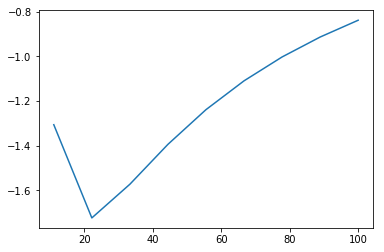

In [4]:

x = np.linspace(0,100,10)
y = [f1(a) for a in x]
print(x)
print(y)
plt.plot(x,y)

# 測試

In [5]:
f1(10**(-6))

inf

In [6]:
y

[inf,
 -1.306056183104685,
 -1.7230257672563,
 -1.5723034683363895,
 -1.3938851588976604,
 -1.2387040319333984,
 -1.1097816358570705,
 -1.0030051790465486,
 -0.9138787229031662,
 -0.8386948043732434]